<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Topic Modeling
## *Data Science Unit 4 Sprint 1 Assignment 4*

Analyze a corpus of Amazon reviews from Unit 4 Sprint 1 Module 1's lecture using topic modeling: 

- Fit a Gensim LDA topic model on Amazon Reviews
- Select appropriate number of topics
- Create some dope visualization of the topics
- Write a few bullets on your findings in markdown at the end
- **Note**: You don't *have* to use generators for this assignment

In [1]:
import numpy as np
import gensim
import os
import re

from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora

from gensim.models.ldamulticore import LdaMulticore

import pandas as pd

In [2]:
# A simple tokenizer

STOPWORDS = set(STOPWORDS).union(set(['said', 'mr', 'mrs']))

def tokenize(text):
    return [token for token in simple_preprocess(text) if token not in STOPWORDS]

In [3]:
# A generator to read lines from a csv file

import csv

def make_csv_generator(filename, colIndex):
    with open(filename, "r") as csv_lines:
        reader = csv.reader(csv_lines)
        for row in reader:
            yield tokenize(row[colIndex].strip('\n')) # I figured out that the text I need is in myrow[20]

In [6]:
path = './data/'
filename = 'Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv'
pathname = path + filename

# instantiate a review generator
data_stream = make_csv_generator(pathname, 20)

# discard first row (column headings)
next(data_stream)

## Code for figuring out which cell has review text
# colnames = next(data_stream)
# colnames
# indexes = range(len(colnames))
# pairs = list(zip(indexes, colnames))
# pairs
# (20, 'reviews.text'), # 20 is index of review.text 

['reviews', 'text']

In [7]:
# Make a dictionary all words in our corpus
id2word = corpora.Dictionary(make_csv_generator(pathname, 20)) # myrow[20] has the text we need.

In [8]:
id2word.token2id['quality']

10

In [9]:
g = make_csv_generator(pathname, 20)
next(g)
test_string = next(g)
test_string

['order',
 'item',
 'bad',
 'quality',
 'missing',
 'backup',
 'spring',
 'pcs',
 'aluminum',
 'battery',
 'work']

In [10]:
import sys
sys.getsizeof(id2word)

56

In [11]:
len(id2word.keys())

9620

In [12]:
# Let's remove extreme values from the dataset
id2word.filter_extremes(no_below=5, no_above=0.95)

In [13]:
len(id2word.keys())

3580

In [14]:
corpus = [id2word.doc2bow(text) for text in make_csv_generator(pathname,20)]

In [16]:
lda = LdaMulticore(corpus=corpus,
                   id2word=id2word,
                   random_state=42,
                   num_topics = 8,
                   passes=5,
                   workers=4
                  )

In [17]:
words = [re.findall(r'"([^"]*)"',t[1]) for t in lda.print_topics()]

In [18]:
topics = [' '.join(t[0:5]) for t in words]

In [19]:
for id, t in enumerate(topics): 
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")

------ Topic 0 ------
kids love games tablet use

------ Topic 1 ------
loves old tablet bought year

------ Topic 2 ------
great tablet bought kindle works

------ Topic 3 ------
batteries battery like great buy

------ Topic 4 ------
great tablet kindle easy use

------ Topic 5 ------
good price quality great amazon

------ Topic 6 ------
tablet apps amazon screen use

------ Topic 7 ------
batteries long great work price



In [20]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()

In [21]:
pyLDAvis.gensim.prepare(lda, corpus, id2word)

/home/gt/anaconda3/envs/U4-S1-NLP-DS10/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7     -0.223846  0.089837       1        1  21.061907
6      0.076700 -0.030246       2        1  13.722667
0      0.096253  0.061909       3        1  13.002550
4      0.037883 -0.058571       4        1  12.494248
1      0.209761  0.017772       5        1  11.631953
3     -0.133707  0.106934       6        1  10.732852
2      0.079256  0.011550       7        1   8.828206
5     -0.142299 -0.199185       8        1   8.525624, topic_info=     Category         Freq        Term        Total  loglift  logprob
20    Default  7535.000000   batteries  7535.000000  30.0000  30.0000
36    Default  5901.000000        good  5901.000000  29.0000  29.0000
1857  Default  2217.000000       loves  2217.000000  28.0000  28.0000
19    Default  4981.000000       price  4981.000000  27.0000  27.0000
2432  Default  6798.000000      tablet  6798.000000  26.0000  26.0000
23    Default  8705.000000       great  8705.000000  25.0000  25.0000
521   Default  2191.000000         old  2191.000000  24.0000  24.0000
755   Default  2891.000000        easy  2891.000000  23.0000  23.0000
9     Default  1397.000000     quality  1397.000000  22.0000  22.0000
107   Default  1831.000000        year  1831.000000  21.0000  21.0000
1548  Default  1805.000000        apps  1805.000000  20.0000  20.0000
2075  Default  2904.000000      kindle  2904.000000  19.0000  19.0000
25    Default  2578.000000        long  2578.000000  18.0000  18.0000
30    Default  3111.000000      bought  3111.000000  17.0000  17.0000
22    Default  1306.000000       brand  1306.000000  16.0000  16.0000
1268  Default   966.000000    daughter   966.000000  15.0000  15.0000
387   Default  1040.000000       value  1040.000000  14.0000  14.0000
885   Default  1073.000000        gift  1073.000000  13.0000  13.0000
192   Default  2572.000000        kids  2572.000000  12.0000  12.0000
76    Default   903.000000      brands   903.000000  11.0000  11.0000
26    Default  3971.000000      amazon  3971.000000  10.0000  10.0000
165   Default  1964.000000     product  1964.000000   9.0000   9.0000
96    Default  4384.000000         use  4384.000000   8.0000   8.0000
652   Default  1770.000000       games  1770.000000   7.0000   7.0000
728   Default   971.000000         son   971.000000   6.0000   6.0000
92    Default  3506.000000        love  3506.000000   5.0000   5.0000
11    Default  2312.000000        work  2312.000000   4.0000   4.0000
33    Default   891.000000   christmas   891.000000   3.0000   3.0000
4     Default  2129.000000     battery  2129.000000   2.0000   2.0000
1679  Default  1632.000000      screen  1632.000000   1.0000   1.0000
...       ...          ...         ...          ...      ...      ...
1196   Topic8    88.471115   bluetooth   135.841904   2.0333  -5.6909
19     Topic8  1752.323120       price  4981.486816   1.4173  -2.7048
75     Topic8   248.791458        beat   487.162170   1.7901  -4.6569
1370   Topic8   109.148224    portable   202.975342   1.8417  -5.4808
101    Topic8    49.923462    delivery    76.573631   2.0343  -6.2630
54     Topic8   146.164581        high   299.703308   1.7440  -5.1888
165    Topic8   604.405579     product  1964.044922   1.2836  -3.7693
172    Topic8    79.210297  reasonable   140.512848   1.8889  -5.8014
1072   Topic8    63.440285    customer   107.289436   1.9367  -6.0234
244    Topic8   256.864502        fast   705.694641   1.4515  -4.6250
257    Topic8   159.775589     amazing   373.981323   1.6117  -5.0998
26     Topic8   840.659790      amazon  3971.319824   0.9094  -3.4393
21     Topic8   417.885529      better  1522.394897   1.1693  -4.1383
295    Topic8   131.283157      decent   313.353882   1.5921  -5.2962
2839   Topic8    67.453773    speakers   120.452332   1.8823  -5.9621
15     Topic8   129.365326    products   356.165405   1.4493  -5.3109
23     Topic8   853.543335       great  8705.286133   0.1

In [22]:
from gensim.models.coherencemodel import CoherenceModel

def compute_coherence_values(dictionary, corpus, limit, start=2, step=3, passes=5):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    limit : Max num of topics
    passes: the number of times the entire lda model & coherence values are calculated

    Returns:
    -------
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    
    coherence_values = []
    
    for iter_ in range(passes):
        for num_topics in range(start, limit, step):
            model = LdaMulticore(corpus=corpus, num_topics=num_topics, id2word=dictionary, workers=4)
            coherencemodel = CoherenceModel(model=model,dictionary=dictionary,corpus=corpus, coherence='u_mass')
            coherence_values.append({'pass': iter_, 
                                     'num_topics': num_topics, 
                                     'coherence_score': coherencemodel.get_coherence()
                                    })

    return coherence_values

In [23]:
# Can take a long time to run.
coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpus,
                                                        start=2, 
                                                        limit=40, 
                                                        step=6,
                                                        passes=7)

In [24]:
topic_coherence = pd.DataFrame.from_records(coherence_values)

In [25]:
topic_coherence.head()

,coherence_score,num_topics,pass
0,-2.592202,2,0
1,-2.630357,8,0
2,-2.631122,14,0
3,-2.832653,20,0
4,-2.788080,26,0


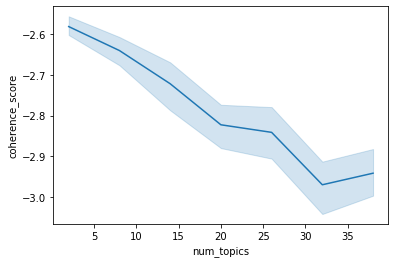

In [27]:
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

ax = sns.lineplot(x="num_topics", y="coherence_score", data=topic_coherence)


## Stretch Goals

* Incorporate Named Entity Recognition in your analysis
* Incorporate some custom pre-processing from our previous lessons (like spacy lemmatization)
* Analyze a dataset of interest to you with topic modeling